In [17]:
%matplotlib inline

In [96]:
import os
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from common_lib.rhyme_analizer import get_lyrics_stat
from common_lib.lyrics_database import LyricsDatabase

In [27]:
generated_song_dir = '/data1/nlp-data/ghostwriter/data/generated_lyrics/'
lyrics_dir = '/data1/nlp-data/ghostwriter/data/top-selling-rappers-cleaned-json'

In [10]:
get_lyrics_stat('/data1/nlp-data/ghostwriter/data/generated_lyrics/lyrics_ngram2_iter1.txt')

{'Average_End_Score': nan,
 'Average_End_Syl_Score': nan,
 'Bridges_per_Line': 0.0,
 'Chaining_per_Line': 0.0,
 'Compounds_per_Line': 0.4,
 'Doubles_per_Rhyme': 0.2857142857142857,
 'End_Pairs_Even': nan,
 'End_Pairs_Grown': nan,
 'End_Pairs_Shrunk': nan,
 'End_Pairs_per_Line': 0.0,
 'Line_Internals_per_Line': 1.0,
 'Links_per_Line': 0.4,
 'Longs_per_Rhyme': 0.0,
 'Novel_Word_Proportion': 0.9576354679802955,
 'Perfect_Rhymes': 0.14285714285714285,
 'Quads_per_Rhyme': 0.0,
 'Rhyme_Density': 0.16981132075471697,
 'Rhymes_per_Line': 1.4,
 'Rhymes_per_Syllable': 0.1320754716981132,
 'Singles_per_Rhyme': 0.7142857142857143,
 'Syllable_Variation': 11.412274094149684,
 'Syllables_per_Line': 10.6,
 'Syllables_per_Word': 1.1521739130434783,
 'Triples_per_Rhyme': 0.0}

In [24]:
num_iterations = 5
ngram_counts = [2,3,4,5,6,7,8,9]
stat_key = 'Syllable_Variation'

rhyme_data = defaultdict(lambda : np.zeros(num_iterations))

for ngram_count in ngram_counts:
    for i in range(0,num_iterations):
        name = 'lyrics_ngram' + str(ngram_count) + '_iter' + str(i) + '.txt'
        filename = os.path.join(generated_song_dir,name)
        
        stat = get_lyrics_stat(filename)
        if stat_key in stat:
            rhyme_data[ngram_count][i] = stat[stat_key]
        else:
            rhyme_data[ngram_count][i] = 0

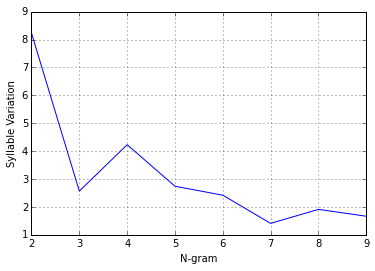

In [25]:
ax = pd.DataFrame(rhyme_data).mean(0).plot()
ax.set_xlabel("N-gram")
ax.set_ylabel("Syllable Variation")

Cmparasion with fabulos verses
=================

In [37]:
ld = LyricsDatabase(lyrics_dir)
fabolous_lyrics = ld.get_lyrics_from_artist_as_list_of_verses('fabolous')

In [51]:
# sample ten random verses
shuffle(fabulous_lyrics)

test_lyrics = []
for l in fabolous_lyrics:
    if len(l) > 20:
        test_lyrics.append(l)
    
    if len(test_lyrics) >= 20:
        break

In [92]:
# convert to texts
is_skip = lambda s : s == '<startVerse>' or s == '<endVerse>'
test_lyrics_texts = [' '.join([t if t != '<endLine>' else '\n' for t in v if not is_skip(t)]) for v in test_lyrics]

In [93]:
# save lyrics
test_veses_dir = '/data1/nlp-data/ghostwriter/tmp_test_fabolous/'
for i,v in enumerate(test_lyrics_texts):
    filename = os.path.join(test_veses_dir, 'fabolous_test_' + str(i) + '.txt')
    with open(filename, 'w') as f:
        f.write(v)

In [94]:
need_stat_keys = ['Rhyme_Density', 'Syllables_per_Line', 'Syllables_per_Word', 'Perfect_Rhymes']
stats = []
for f in os.listdir(test_veses_dir):
    filename = os.path.join(test_veses_dir, f)
    stat = get_lyrics_stat(filename)
    
    need_stat = {}
    for k in need_stat_keys:
        if k in stat:
            need_stat[k] = stat[k]
        else:
            need_stat[k] = 0
            
    stats.append(need_stat)

In [99]:
stats_data = pd.DataFrame(stats)

Fabolous rhymes
=========

In [60]:
lstm_generated_lyrics_dir = '/data1/nlp-data/ghostwriter/lstm-gen-lyrics'

In [73]:
need_iterations = [7100, 7200, 7400, 7600, 7800]
need_stat_keys = ['Rhyme_Density', 'Syllables_per_Line', 'Syllables_per_Word', 'Perfect_Rhymes']

In [85]:
stats_generated = []
for i in need_iterations:
    filename = os.path.join(lstm_generated_lyrics_dir, 'fabolous' + str(i))
    stat = get_lyrics_stat(filename)
    
    need_stat = {}
    for k in need_stat_keys:
        if k in stat:
            need_stat[k] = stat[k]
        else:
            need_stat[k] = 0
            
    stats_generated.append(need_stat)

In [86]:
stats_data_generated = pd.DataFrame(stats_generated, index=need_iterations)

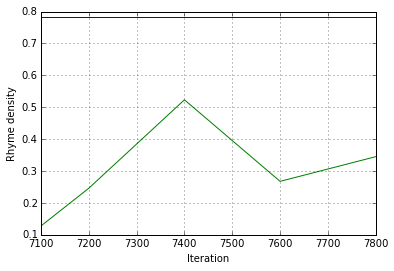

In [111]:
y1 = y2 = stats_data['Rhyme_Density'].mean()
x1 = 7100
x2 = 7800
plt.figure()
plt.plot((x1, x2), (y1, y2))
ax = stats_data_generated['Rhyme_Density'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Rhyme density")

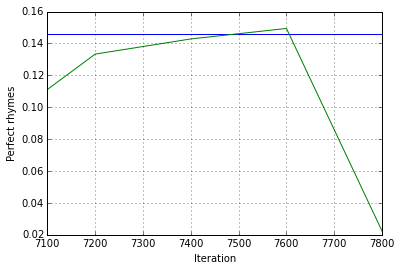

In [112]:
y1 = y2 = stats_data['Perfect_Rhymes'].mean()
x1 = 7100
x2 = 7800
plt.figure()
plt.plot((x1, x2), (y1, y2))
ax = stats_data_generated['Perfect_Rhymes'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Perfect rhymes")

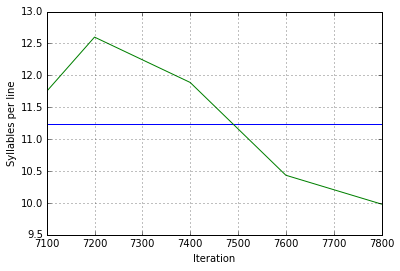

In [113]:
y1 = y2 = stats_data['Syllables_per_Line'].mean()
x1 = 7100
x2 = 7800
plt.figure()
plt.plot((x1, x2), (y1, y2))
ax = stats_data_generated['Syllables_per_Line'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Syllables per line")

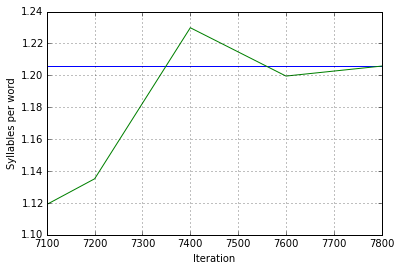

In [114]:
y1 = y2 = stats_data['Syllables_per_Word'].mean()
x1 = 7100
x2 = 7800
plt.figure()
plt.plot((x1, x2), (y1, y2))
ax = stats_data_generated['Syllables_per_Word'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Syllables per word")

In [100]:
stats_data['Syllables_per_Word'].mean()

1.2058258794405083